In [43]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

In [44]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [45]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

(60000, 'train samples')
(10000, 'test samples')


In [46]:
import matplotlib.pyplot as plt
plt.ion()

In [47]:
X_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [48]:
#convert class vectors to binary class matrices
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [49]:
print X_train[0].shape
print y_train[0].shape

(784,)
()


In [50]:
X_train[0].reshape(28,28)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

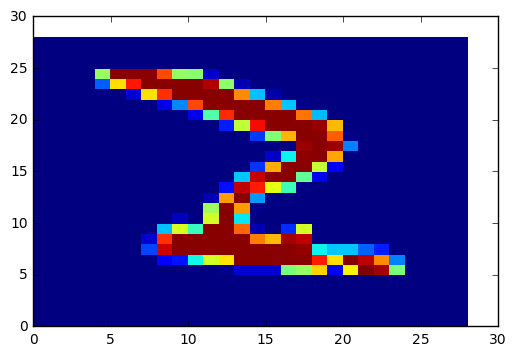

In [51]:
plt.pcolor(X_train[0].reshape(28,28))

In [52]:
model = Sequential()

In [53]:
#model. in ipython to view all methods
model.add(Dense(128, input_shape=(784,)))
#model.add(Activation(128, input_shape=(784,)))

#784+1 * 128?

In [54]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_3 (Dense)                  (None, 128)           100480      dense_input_2[0][0]              
Total params: 100480
____________________________________________________________________________________________________


In [55]:
model.add(Activation('sigmoid'))

In [56]:
model.add(Dense(10))

In [57]:
model.add(Activation('softmax'))

In [58]:
#if add twice, drop last one
#model.layers = model.layers[:-1]

In [59]:
sgd=SGD()

In [60]:
%time model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

CPU times: user 11.6 ms, sys: 2.36 ms, total: 13.9 ms
Wall time: 13.2 ms


In [61]:
model.layers

In [62]:
h = model.fit(X_train, Y_train, batch_size =128, nb_epoch=3, show_accuracy = True, validation_data = (X_test, Y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 1s - loss: 0.5342 - acc: 0.8736 - val_loss: 0.2817 - val_acc: 0.9185
Epoch 2/3
60000/60000 [==============================] - 2s - loss: 0.2523 - acc: 0.9279 - val_loss: 0.2233 - val_acc: 0.9345
Epoch 3/3
60000/60000 [==============================] - 2s - loss: 0.2012 - acc: 0.9419 - val_loss: 0.1796 - val_acc: 0.9475


In [32]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 128)           100480      dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 128)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 128)           0           activation_1[0][0]               
Total params: 100480
____________________________________________________________________________________________________


In [34]:
h.history

NameError: name 'h' is not defined

In [35]:
score = model.evaluate(X_test, Y_test, verbose=0)

Exception: Error when checking model target: expected activation_2 to have shape (None, 128) but got array with shape (10000, 10)

In [36]:
model.weight()

AttributeError: 'Sequential' object has no attribute 'weight'